# Telecom Customer Churn Prediction

The aim of this project is to analyze customer demographics, services, tenure and other variables to predict whether a particular customer will churn or not. 

### Data Dictionary

| Variable | Description |
| --- | --- |
|CustomerID| Unique customer ID|
|Gender|Customer's gender|
|SeniorCitizen|Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|Tenure|Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service)|
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Preprocessing 

In [4]:
#Checking the shape of the dataset
df.shape

(7043, 21)

In [5]:
#Checking the datatypes of the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Type casting column Total Charges

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
#Checking for null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#Droping the null values
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
#Removing the customerID column
df.drop(columns='customerID', inplace=True)

In [12]:
#Checking for duplicate values
df.duplicated().sum()

22

In [13]:
#Removing the duplicate values
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
#checking number of unique values in each column
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [16]:
columns = df.columns
columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
#Checking the unique values in each column
for i in columns:
    print(i, df[i].unique(), '\n')

gender ['Female' 'Male'] 

SeniorCitizen [0 1] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService ['No' 'Yes'] 

MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['Yes' 'No'] 

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7

#### Descriptive Statistics

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Outlier Removal

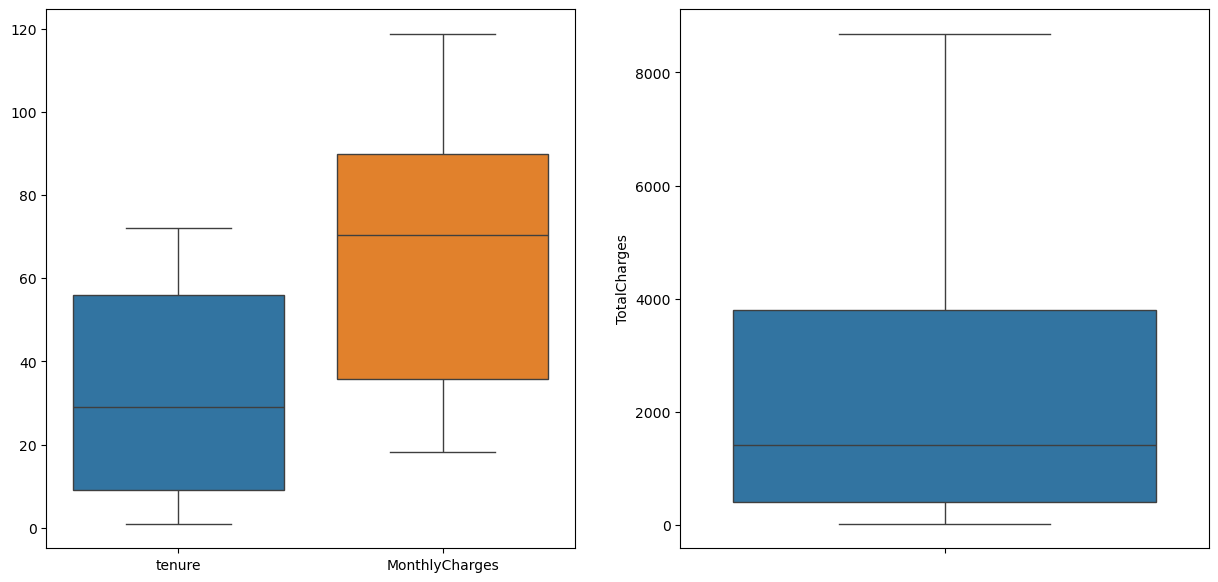

In [20]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.boxplot(df.drop(columns=['TotalCharges','SeniorCitizen']))

plt.subplot(1,2,2)
sns.boxplot(df['TotalCharges'])

plt.show()

In [21]:
df.shape

(7010, 20)

In [22]:
#Columns for outlier removal
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Using IQR method to remove outliers
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

#Removing the outliers
# df = df[(df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))]
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [23]:
df.shape

(7010, 20)

There is no outliers in the dataset.

## Exploratory Data Analysis

In the exploratory data analysis, I will be visualizing the data to get a better understanding of the data and to see if there are any trends or pattern in the data. First I will begin with looking at the distribution of the data and then I will look at the relationship between the independent variables and the target variable.

### Customer Demographics

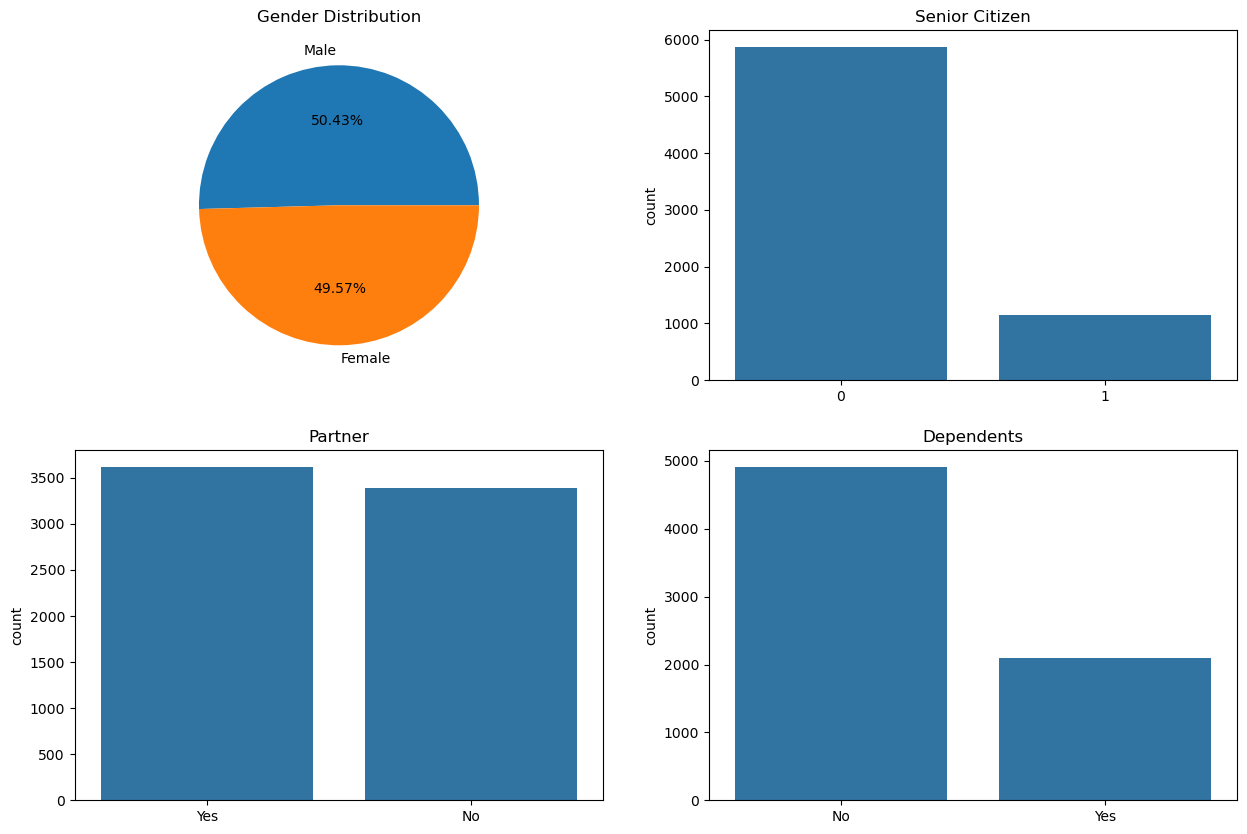

In [24]:
plt.figure(figsize=(15,10))

#Gender Distribution
plt.subplot(2, 2, 1)
plt.pie(df['gender'].value_counts(),labels=['Male','Female'],autopct='%1.2f%%')
plt.title('Gender Distribution')

#Senior Citizen Distribution
plt.subplot(2, 2, 2)
sns.barplot(y = df['SeniorCitizen'].value_counts(), x = df['SeniorCitizen'].unique()).set_title('Senior Citizen')

#Partner Distribution
plt.subplot(2, 2, 3)
sns.barplot(y = df['Partner'].value_counts(), x = df['Partner'].unique()).set_title('Partner')

#Dependents Distribution
plt.subplot(2, 2, 4)
sns.barplot(y = df['Dependents'].value_counts(), x = df['Dependents'].unique()).set_title('Dependents')


plt.show()

These graphs shows the customer demographics. The number of males and females is almost same, with few more males than females in the dataset. Majority of them are not senior citizen. Nearly 3500, customers have a partner and similar number of cutomers don't. Majority of the customers don't have dependents, but still a significant number does have dependents. 

From these graphs, we get know about the customers demographics, which help us to get an idea of their psychology based on their age, relationship status, and dependents.

## Services

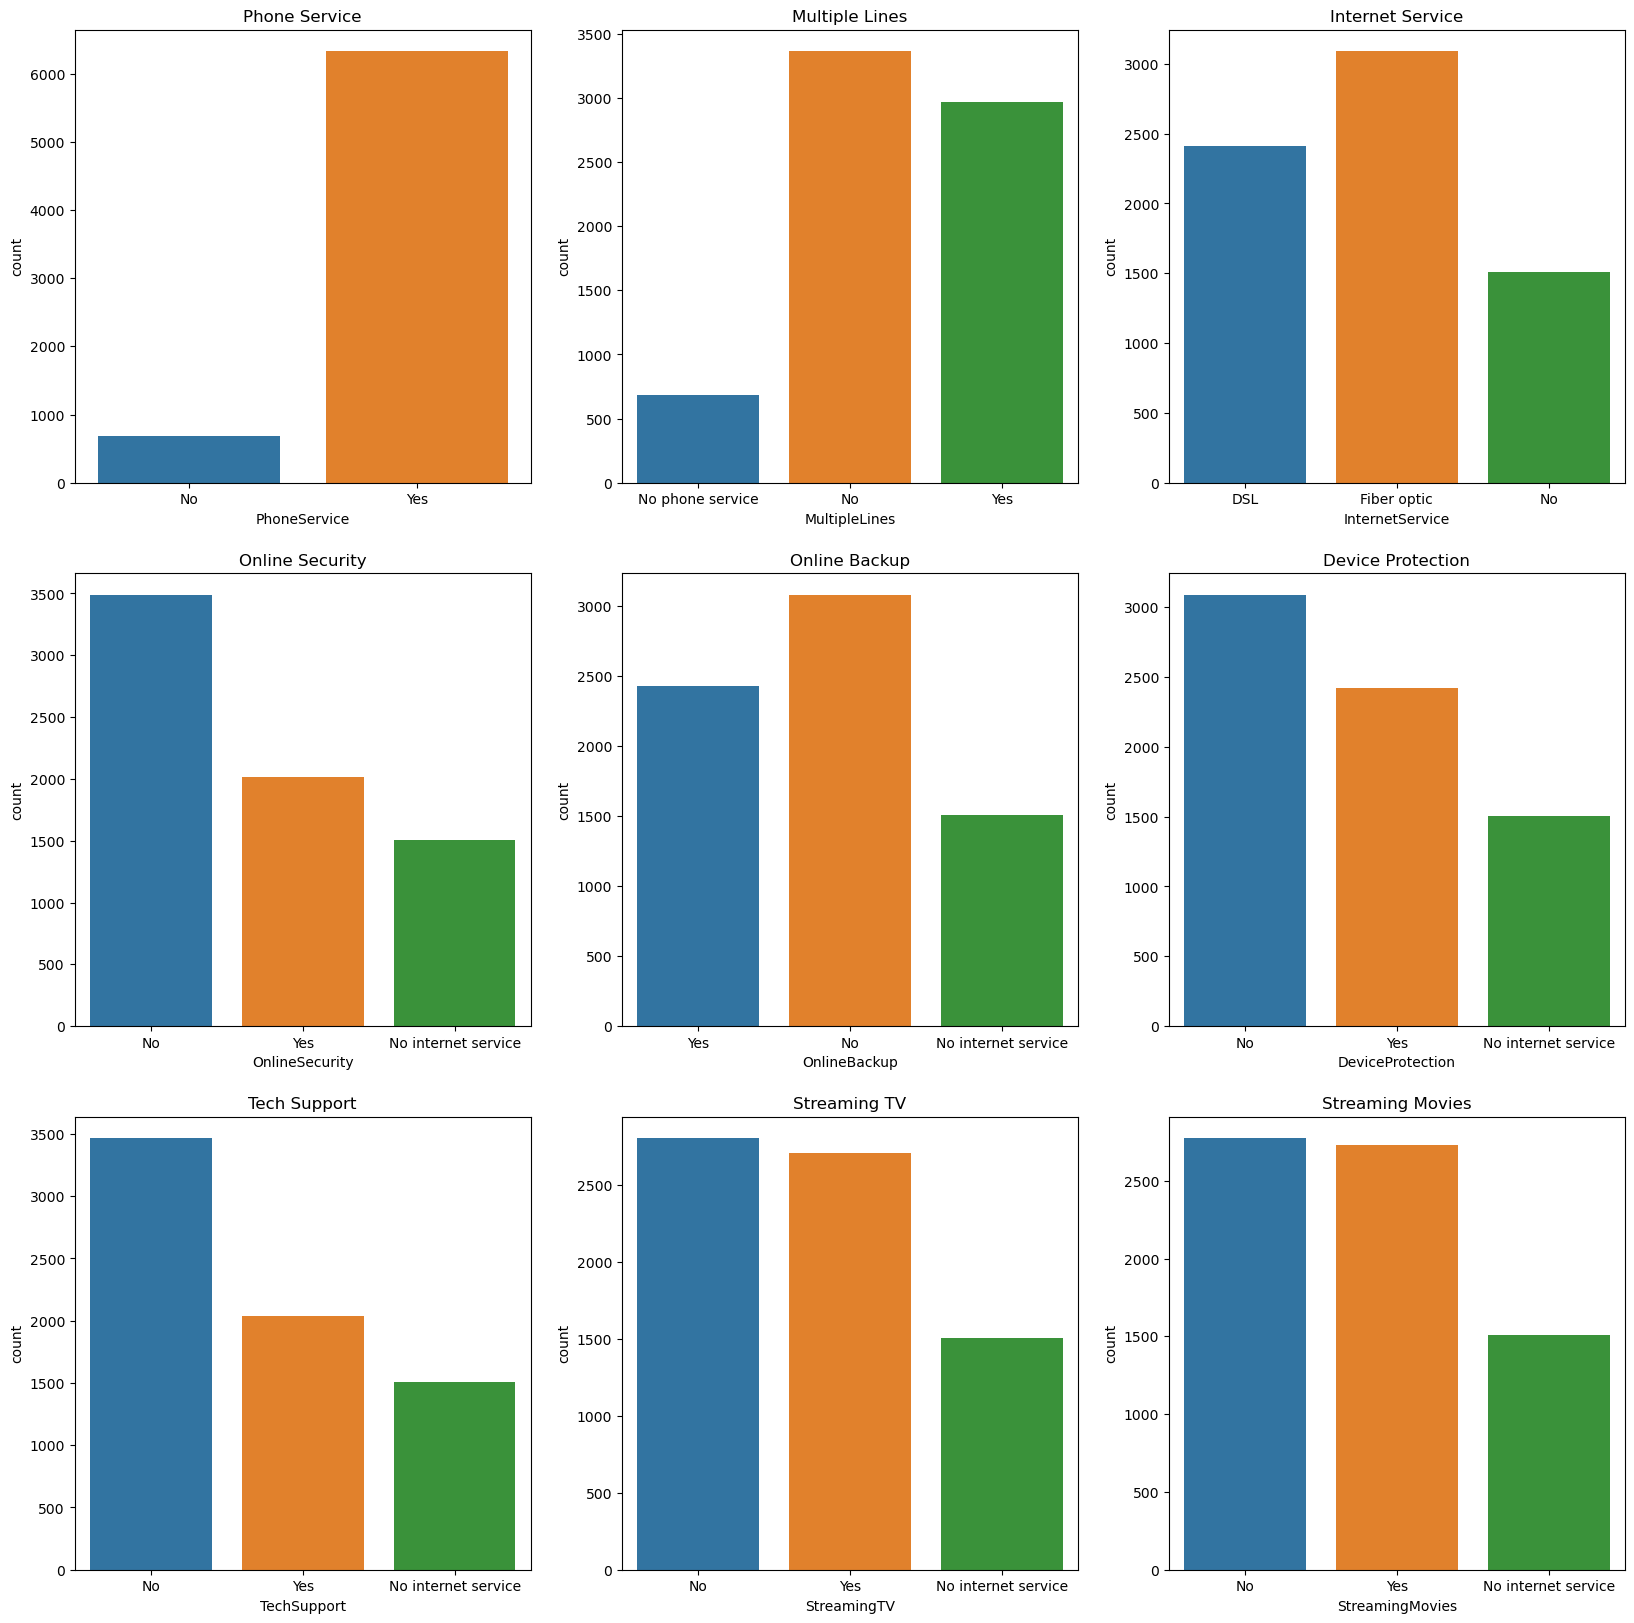

In [25]:
plt.figure(figsize=(20, 20))

#phone service
plt.subplot(3,3,1)
sns.countplot(x=df['PhoneService'],hue=df['PhoneService']).set_title("Phone Service")

#Multiple Lines
plt.subplot(3,3,2)
sns.countplot(x=df['MultipleLines'],hue=df['MultipleLines']).set_title("Multiple Lines")

#Internet Service
plt.subplot(3,3,3)
sns.countplot(x=df['InternetService'],hue=df['InternetService']).set_title("Internet Service")

#Online Security
plt.subplot(3,3,4)
sns.countplot(x=df['OnlineSecurity'],hue=df['OnlineSecurity']).set_title("Online Security")

#Online Backup
plt.subplot(3,3,5)
sns.countplot(x=df['OnlineBackup'],hue=df['OnlineBackup']).set_title("Online Backup")

#Device Protection
plt.subplot(3,3,6)
sns.countplot(x=df['DeviceProtection'],hue=df['DeviceProtection']).set_title("Device Protection")

#Tech Support
plt.subplot(3,3,7)
sns.countplot(x=df['TechSupport'],hue=df['TechSupport']).set_title("Tech Support")

#Streaming TV
plt.subplot(3,3,8)
sns.countplot(x=df['StreamingTV'],hue=df['StreamingTV']).set_title("Streaming TV")

#Streaming Movies
plt.subplot(3,3,9)
sns.countplot(x=df['StreamingMovies'],hue=df['StreamingMovies']).set_title("Streaming Movies")

plt.show()

The above graphs visualizes the services taken by the customers from the telecom company. Nearly 6000 customers have taken phone service. However, nealry half of the cutomers have taken multiplt lines from the company. Almost 5500, have taken internet services from the company, where 3000 customers opted fibre optcs and rest of them opted DSL which could possible for business purposes. From these three major services related to telecom, the phone services and the internet services are the most popular services among the customers.

Coming to other services which includes- Online Security, Online Backup, Device Protection, Tech Support, and Streaming Services. The online backup and device protection service is opted by almost 2500 customers, which higlights the customers concern regarding their device safety and data protection. The online security and tech support is opted by almost 2000 customers which are least opted services among the customers. The streaming services are the most popular services, with more than 2500 customers opting for it.

From this,I conclude that part from the internet and phone services, the streaming services are most opted ones. Therefore, the company should focus on providing better streaming services to the customers.

### Tenure and Contract

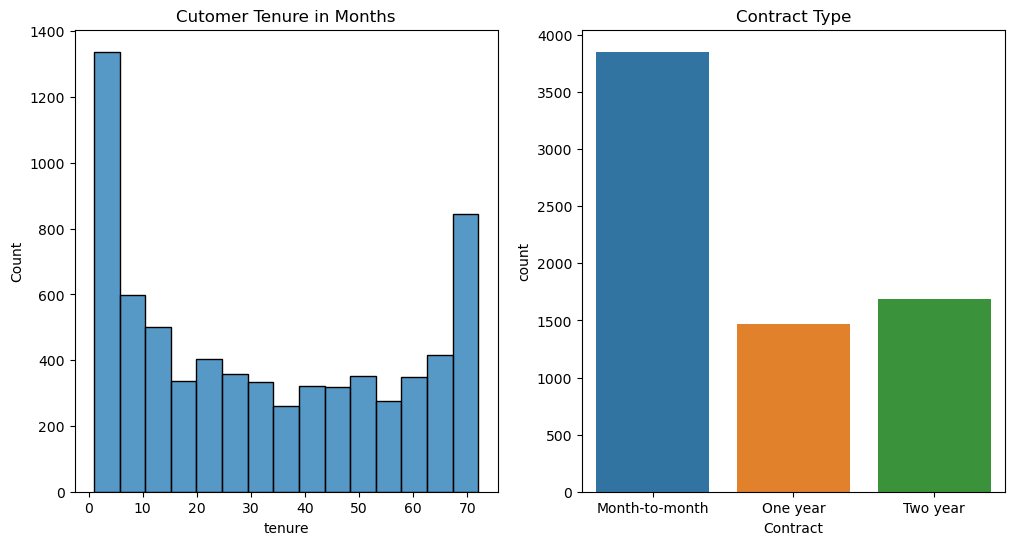

In [26]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(x = 'tenure', data = df).set_title('Cutomer Tenure in Months')

plt.subplot(1,2,2)
sns.countplot(x = 'Contract', data = df,hue='Contract').set_title('Contract Type')

plt.show()

In the aboove graphs we can see the distribution of customer tenure with the comapny and the count of the type of contarct the company had with customer. Here, most if the customers had tenure less than a month, and most of the customers had a month-to-month contract with the company. Therfore, the customers with shorter tenure have month-to-month contract with the company. In addtion to that, a significant number of customers have tenure of nealry 70 months, which highlights the loyalty of the customers towards the company. Moreover, after month-to-month contract, the second most popular contract is two-year contract, which is opted by almost 1700 customers. Rest of the customers have tenure between 1-5 years.

### Billing and Charges

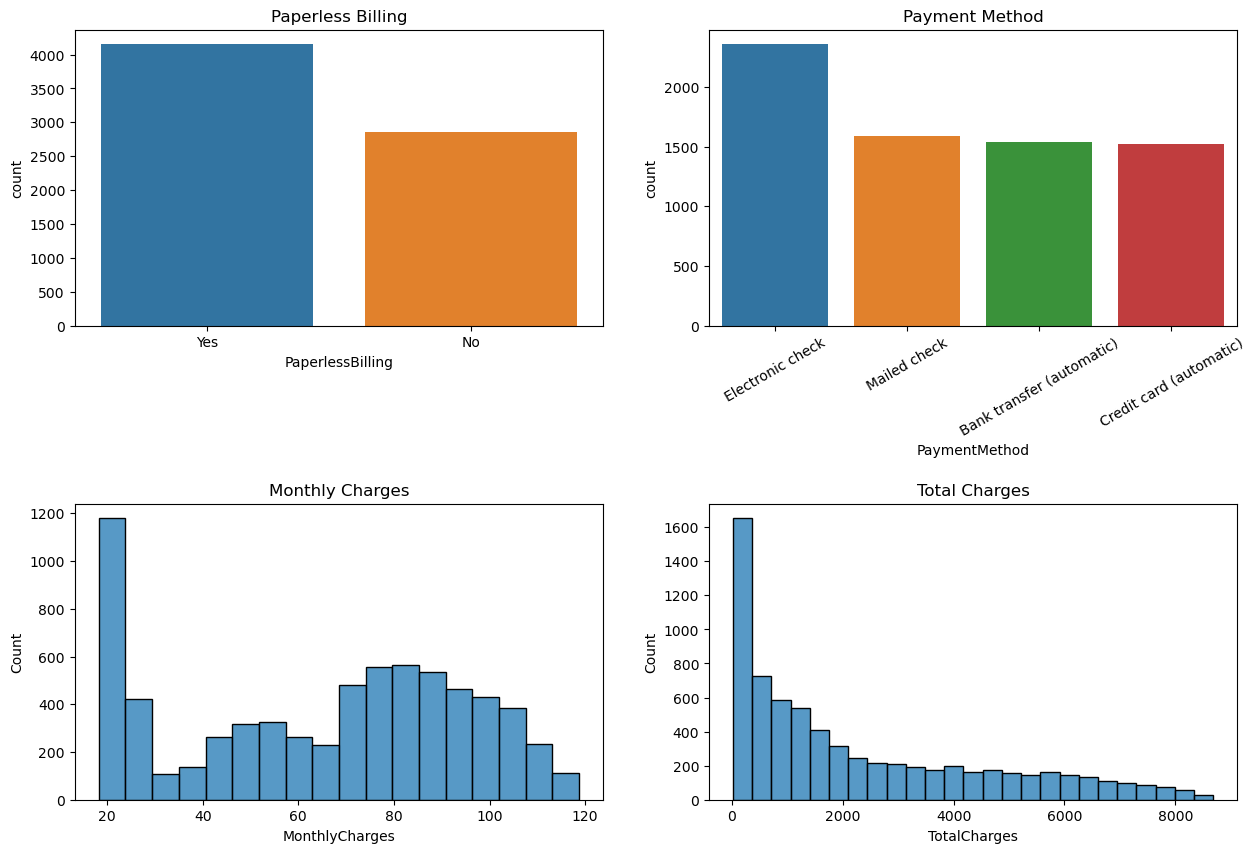

In [27]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=.6)

#papaerless billing
plt.subplot(2,2,1)
sns.countplot(x = df['PaperlessBilling'],hue=df['PaperlessBilling']).set_title('Paperless Billing')

#Payment Method
plt.subplot(2,2,2)
sns.countplot(x = df['PaymentMethod'],hue=df['PaymentMethod']).set_title('Payment Method')
plt.xticks(rotation=30)

#Monthly Charges
plt.subplot(2,2,3)
sns.histplot(x=df['MonthlyCharges']).set_title("Monthly Charges")

#Total Charges
plt.subplot(2,2,4)
sns.histplot(x=df['TotalCharges']).set_title("Total Charges")

plt.show()

These graphs shows the method of billing and the bill amounts. Most of the customers, nearly 4000 prefer paperless billing, however, a little bit over half of them pays through electronic check. But still a significant number of customers prefer paper bills. Apart from electronic checks, the other modes of payment accepted by the company includes - mailed checks, bank transfer and credit cards. Nearly 4500 customers altogether prefer these modes of payment.

Now, for the montly charges, huge number of customers pays near 20 dollars for the montly services and majority of the customer having total charges less than 2000 dollars. However, there are considerable number of customers having monthly charges between 70 to 100 dollars. Interestingly, If we look at the total charges graph, we can see that some customers have a total bill more than 4000 and even 8000 as well. This could be possible, if the customer has a long tenure or uses alot of services.

Now, I conclude that company mainly have customers with low charges, which means company should focus on these customers by providing even more afforadable services.

### Churn Count

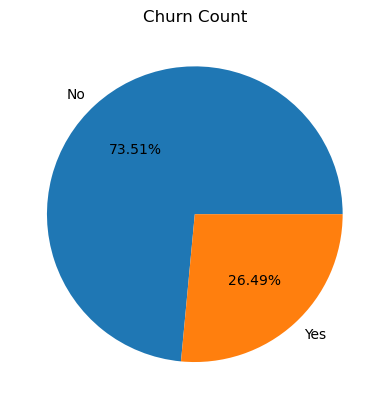

In [28]:
plt.pie(x = df['Churn'].value_counts(), labels = df['Churn'].unique(), autopct = '%1.2f%%')
plt.title('Churn Count')
plt.show()

In the dataset, the number of churning customers is very less as compared to non churning. Only 26.49% churnned from the telecom company. This could be a potential proof, that company is quite good at retaning its customers.

##### Till now, I have visualized the data and got a better understanding of the data. Now, I will look at the relationship between the independent variables and the target variable.

### Customer Demogrpahics and Churn

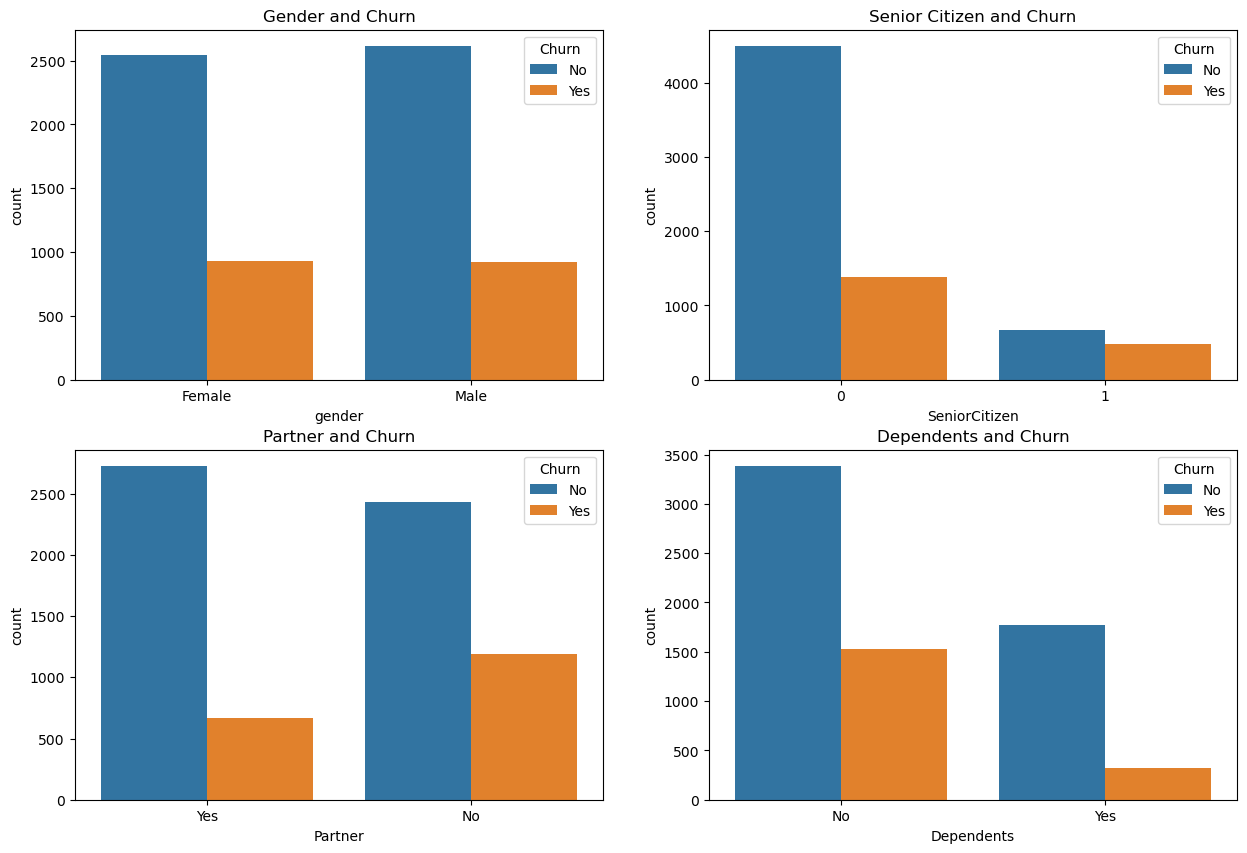

In [29]:
plt.figure(figsize=(15,10))

#Gender Distribution
plt.subplot(2, 2, 1)
sns.countplot(x=df['gender'],hue=df['Churn']).set_title("Gender and Churn")

#Senior Citizen Distribution
plt.subplot(2, 2, 2)
sns.countplot(x=df['SeniorCitizen'],hue=df['Churn']).set_title("Senior Citizen and Churn")

#Partner Distribution
plt.subplot(2, 2, 3)
sns.countplot(x=df['Partner'],hue=df['Churn']).set_title("Partner and Churn")

#Dependents Distribution
plt.subplot(2, 2, 4)
sns.countplot(x=df['Dependents'],hue=df['Churn']).set_title("Dependents and Churn")

plt.show()

From these graphs, we can get know about the relation between customer demographics and customer churn. Both makes and females have equal number of churn count, so there is not relation between gender and customer churn. However, the senior citizens have a lesser churn count as compared to non senior citizens, which may be because their age and they don't want to hasle with the process of changing the telecom company. The customers with no partners have higher churn count as compared to customers with partners. Similarly, customers with no dependents have higher churn count as compared to customers with dependents.

From this I conclude that customers whom are single with no partner or have no dependents have higher churn count and senior citizens have lower churn count.

### Services and Churn

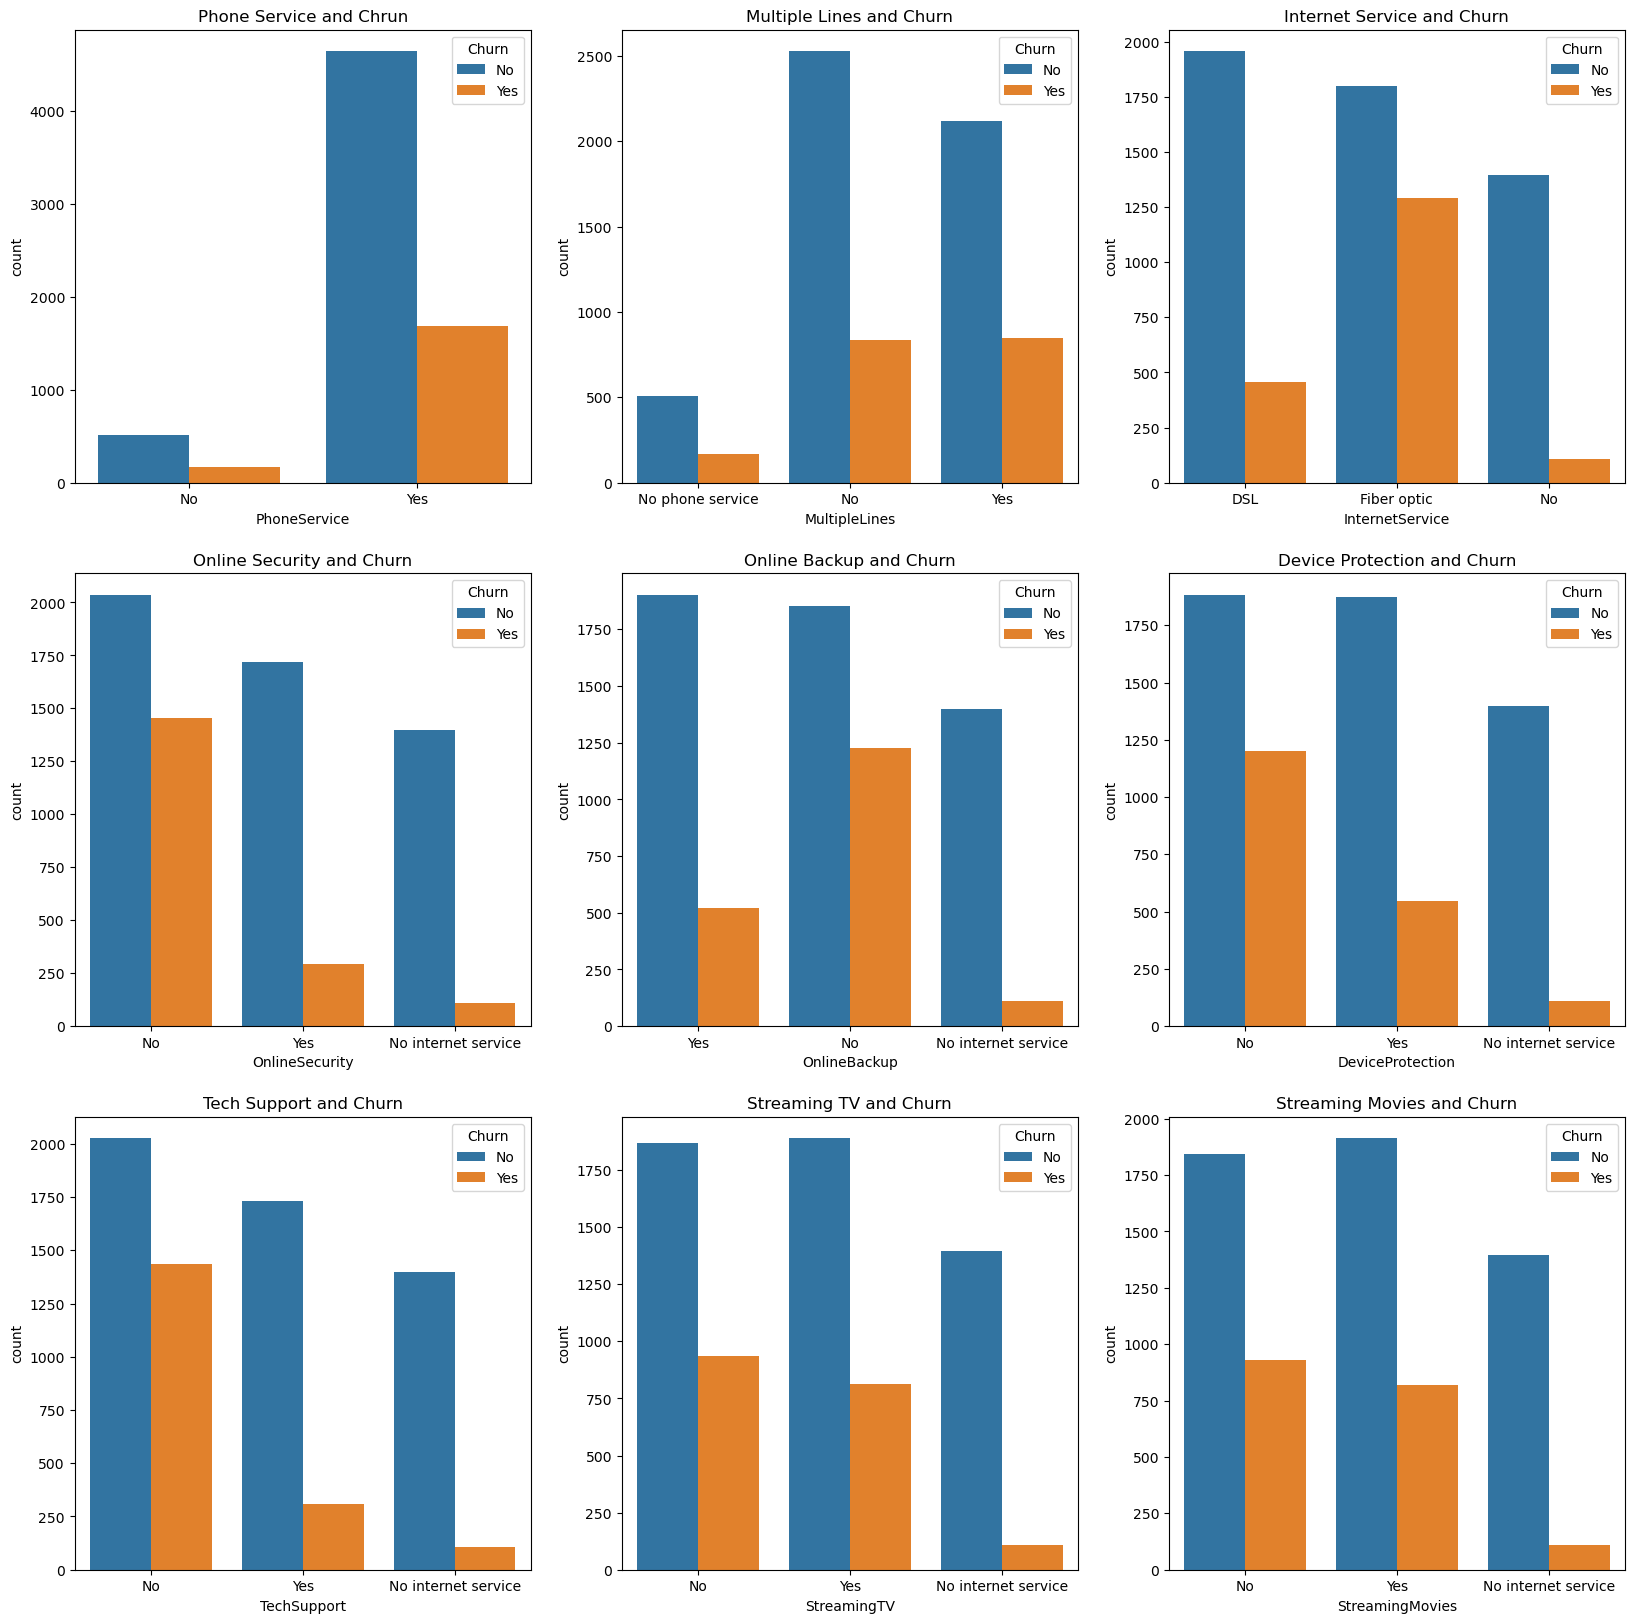

In [30]:
plt.figure(figsize=(20, 20))

#phone service
plt.subplot(3,3,1)
sns.countplot(x=df['PhoneService'],hue=df['Churn']).set_title("Phone Service and Chrun")

#Multiple Lines
plt.subplot(3,3,2)
sns.countplot(x=df['MultipleLines'],hue=df['Churn']).set_title("Multiple Lines and Churn")

#Internet Service
plt.subplot(3,3,3)
sns.countplot(x=df['InternetService'],hue=df['Churn']).set_title("Internet Service and Churn")

#Online Security
plt.subplot(3,3,4)
sns.countplot(x=df['OnlineSecurity'],hue=df['Churn']).set_title("Online Security and Churn")

#Online Backup
plt.subplot(3,3,5)
sns.countplot(x=df['OnlineBackup'],hue=df['Churn']).set_title("Online Backup and Churn")

#Device Protection
plt.subplot(3,3,6)
sns.countplot(x=df['DeviceProtection'],hue=df['Churn']).set_title("Device Protection and Churn")

#Tech Support
plt.subplot(3,3,7)
sns.countplot(x=df['TechSupport'],hue=df['Churn']).set_title("Tech Support and Churn")

#Streaming TV
plt.subplot(3,3,8)
sns.countplot(x=df['StreamingTV'],hue=df['Churn']).set_title("Streaming TV and Churn")

#Streaming Movies
plt.subplot(3,3,9)
sns.countplot(x=df['StreamingMovies'],hue=df['Churn']).set_title("Streaming Movies and Churn")

plt.show()

These graphs visualizes the relation between customer churn based on services opted by the customer. In the phone and internet service, there is no relation between churn and service opted, however the churn count is higher for the customers, who have taken multiple lines. Coming to other services, where customers who have not taken Online backup or Device Protection service has higher churn count, than those who have opted. Moreover, the customers with streaming services have lower churn count as compared to those who have not opted for it.

Therefore, certain services have relation with the customer churn, which are multiple lines, Online Backup, Device Protection, and Streaming Services.

### Tenure/Contract and Churn

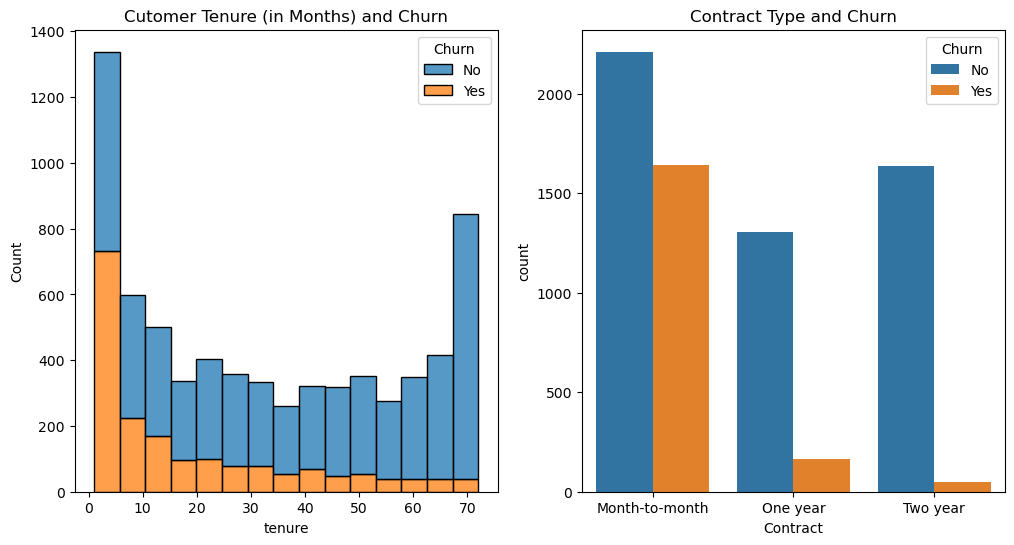

In [31]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(x = 'tenure', data = df, hue='Churn', multiple = 'stack').set_title('Cutomer Tenure (in Months) and Churn') 

plt.subplot(1,2,2)
sns.countplot(x = 'Contract', data = df,hue='Churn').set_title('Contract Type and Churn')

plt.show()

Looks like the customer tenure and contract has a inverse relation. The customers with shorter tenure or tenure less than 5 months have higher churn count. The churn count decreases with increase in tenure. Moreover, the customers with month-to-month contract have higher churn count as compared to those with one or two year contract which also proves that customer who have longer contract with the company have lower churn count.

### Billing/Charges and Churn¶

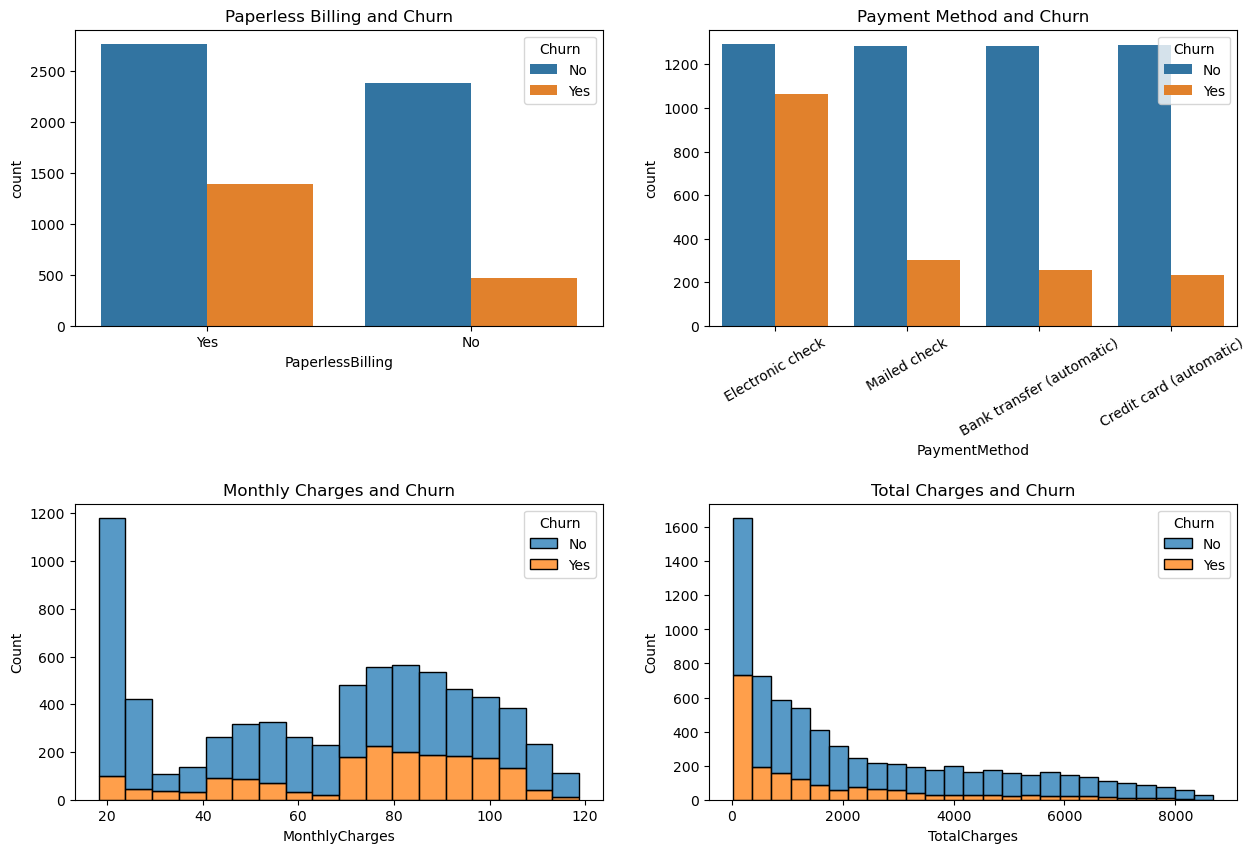

In [32]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=.6)

#papaerless billing
plt.subplot(2,2,1)
sns.countplot(x = df['PaperlessBilling'],hue=df['Churn']).set_title('Paperless Billing and Churn')

#Payment Method
plt.subplot(2,2,2)
sns.countplot(x = df['PaymentMethod'],hue=df['Churn']).set_title('Payment Method and Churn')
plt.xticks(rotation=30)

#Monthly Charges
plt.subplot(2,2,3)
sns.histplot(x=df['MonthlyCharges'], hue = df['Churn'], multiple= 'stack').set_title("Monthly Charges and Churn")

#Total Charges
plt.subplot(2,2,4)
sns.histplot(x=df['TotalCharges'], hue = df['Churn'], multiple= 'stack').set_title("Total Charges and Churn")

plt.show()

The paperless billing and payment method have not significant relation with the customer churn. However, the montly and total charges do have a interesting relation with the customer churn. The customers with higher monthly charges have higher churn count, which is quite obvious. But, the customers with higher total charges have lower churn count, which is quite interesting. This could be possible, if the customer has a long tenure or uses alot of services. Therefore, the company should focus on lowering the monthly charges for the customers in order to reduce the churn count.

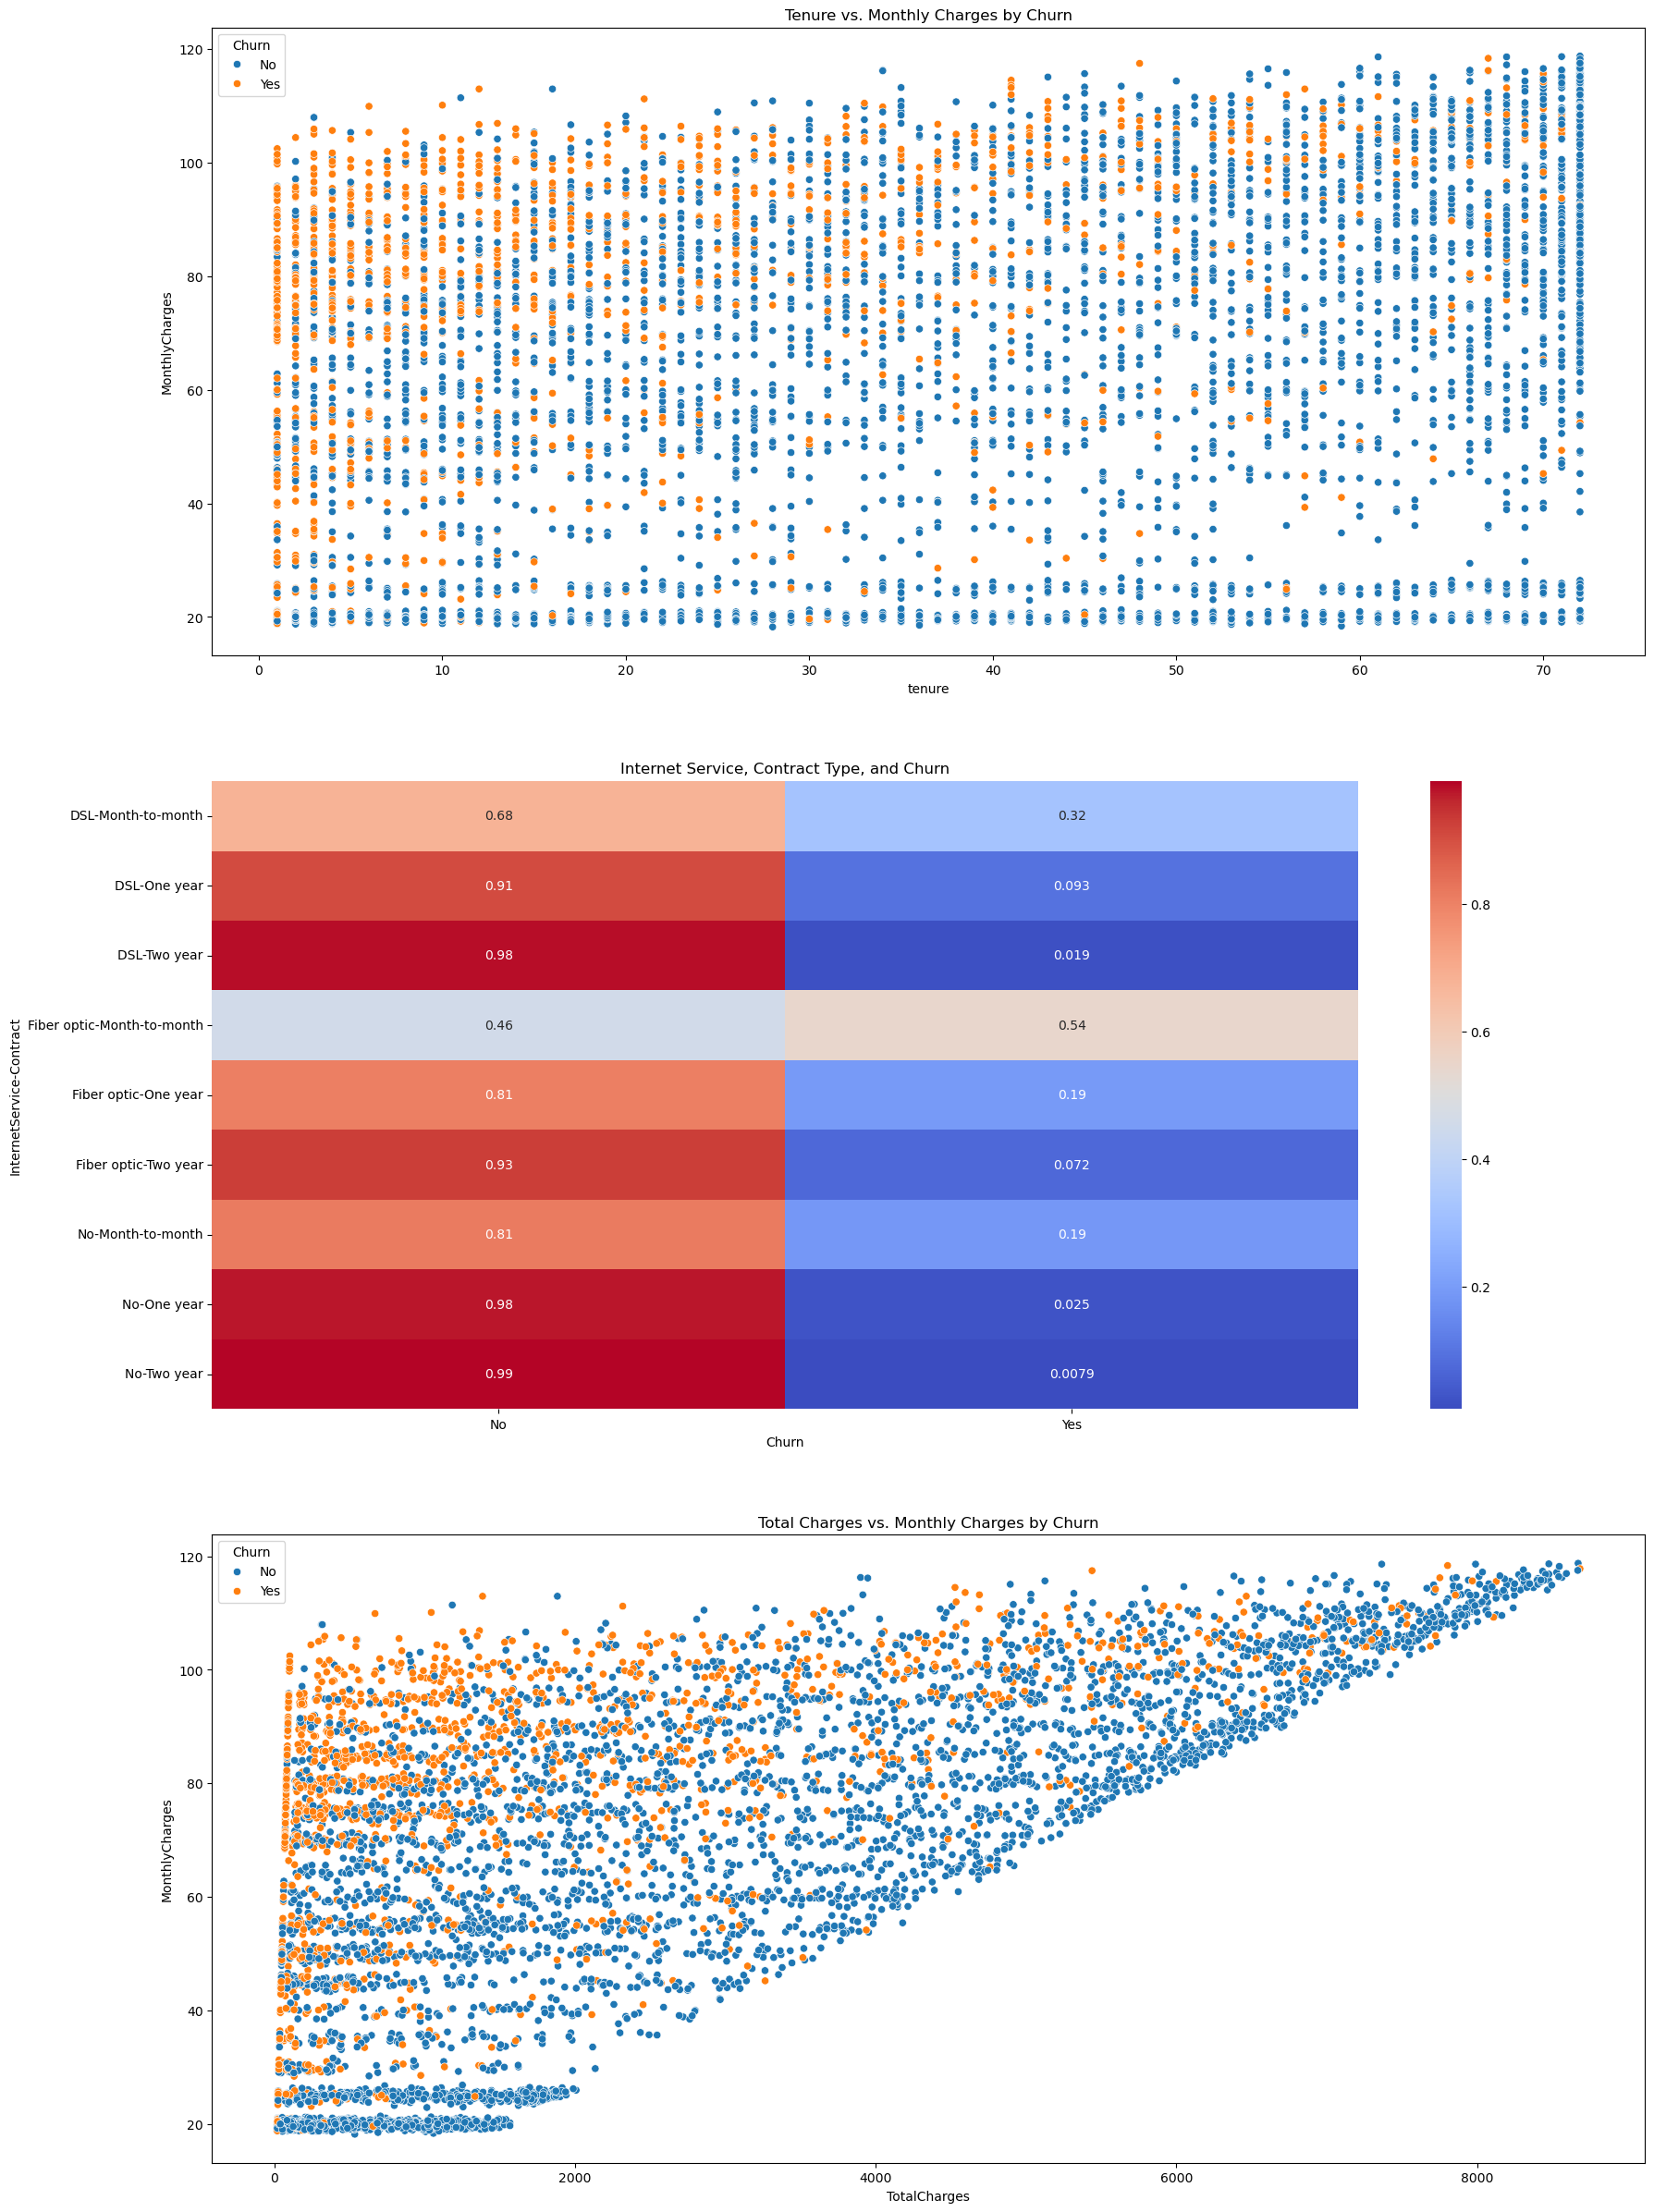

In [33]:
plt.figure(figsize=(20, 30))

plt.subplot(3, 1, 1)
sns.scatterplot(x=df["tenure"], y=df["MonthlyCharges"], hue=df["Churn"])
plt.title("Tenure vs. Monthly Charges by Churn")

plt.subplot(3, 1, 2)
sns.heatmap(pd.crosstab(index=[df['InternetService'], df['Contract']], columns=df['Churn'], normalize='index'), annot=True, cmap="coolwarm")
plt.title("Internet Service, Contract Type, and Churn")

plt.subplot(3, 1, 3)
sns.scatterplot(x=df["TotalCharges"], y=df["MonthlyCharges"], hue=df["Churn"])
plt.title("Total Charges vs. Monthly Charges by Churn")

plt.show()

## Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
#colums for label encoding
cols = df.columns[df.dtypes == 'object']

#Label encoder object
le = LabelEncoder()

#Label encoding the columns
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique(), '\n')

gender [0 1] 

Partner [1 0] 

Dependents [0 1] 

PhoneService [0 1] 

MultipleLines [1 0 2] 

InternetService [0 1 2] 

OnlineSecurity [0 2 1] 

OnlineBackup [2 0 1] 

DeviceProtection [0 2 1] 

TechSupport [0 2 1] 

StreamingTV [0 2 1] 

StreamingMovies [0 2 1] 

Contract [0 1 2] 

PaperlessBilling [1 0] 

PaymentMethod [2 3 0 1] 

Churn [0 1] 



## Feature Engineering
#### Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
#Standardizing the data
sc = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = sc.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.285566,0,1,0,0,2,0,0,0,0,0,1,2,-1.165523,-0.997284,0
1,1,0,0,0,0.060346,1,0,0,2,0,2,0,0,0,1,0,3,-0.264071,-0.176848,0
2,1,0,0,0,-1.244781,1,0,0,2,2,0,0,0,0,0,1,3,-0.367189,-0.962740,1


## Correlation Matrix Heatmap

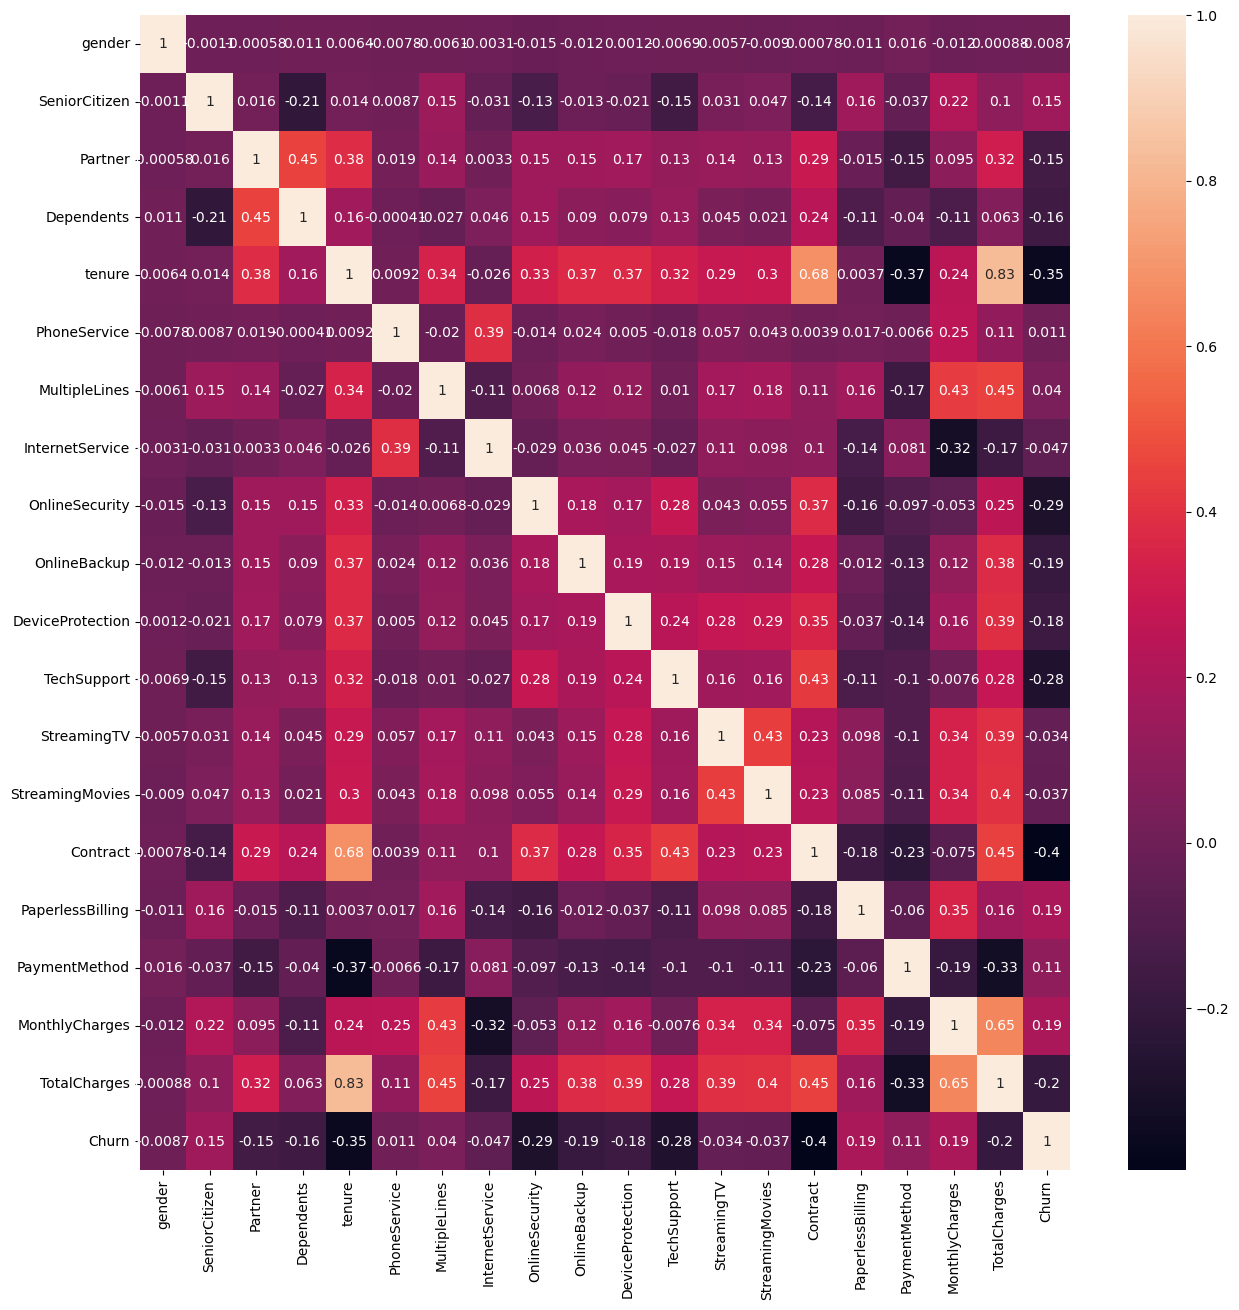

In [38]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Conclusion

##### From the exploratory data analysis, I came to know that, the senior citizens have lower churn count whereas the customers who are single or don't have dependents ahve higher churn count. In addition to that, customers are more satified with the streaming services than other services such as Online backup and Device protection, which has resulted in lower churn count in customer with streaing services than the other services.

##### The tenure have an inverse relation with churn count, where customer with tenure shorter than 5 months have higher churn count. Moreover, the customers with month-to-month contract have higher churn count as compared to those with one or two year contract which also proves that customer who have longer contract with the company have lower churn count.

##### It has been observed that the customers with higher monthly charges and lower total charges have higher churn count. Therefore, the company should focus on lowering the monthly charges for the customers in order to reduce the churn count. From the feature importance, it is clear that the tenure, contract, monthly charges, and total charges are the most important features for predicting the customer churn. Therefore, the company should focus on these features to reduce the customer churn.